<a href="https://colab.research.google.com/github/Tejjus/amazon_review_sentiment_analysis/blob/main/sentiment_analysis_using_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
url = "https://raw.githubusercontent.com/Tejjus/amazon_review_sentiment_analysis/main/dataset/amazon_reviews"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


### We can convert the ratings of the given products into their respective sentiments with some common maths.
#***(4-5) : positive | (3) : neutral | (1-2) : negative***

In [3]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [4]:
df['overall'] = df["overall"].apply(sentiment)

In [5]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,Positive,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,Positive,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,Positive,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,Positive,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,Positive,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


<Axes: >

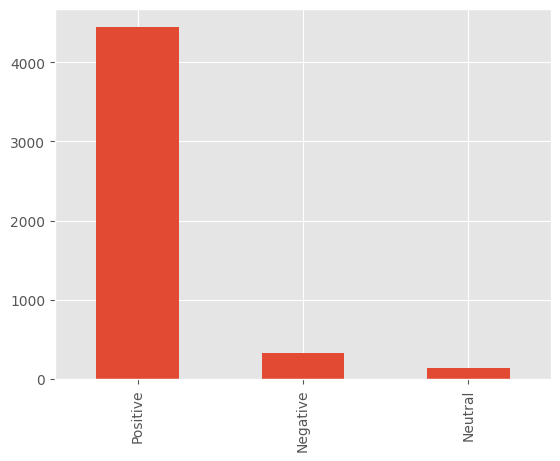

In [6]:
df.overall.value_counts().plot(kind = "bar")

In [7]:
df["reviewText"] = df["reviewText"].astype(str)
def toLower(text):
    return text.lower()

df["reviewText"] = df["reviewText"].apply(toLower)

In [8]:
def data_preprocessing(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [9]:
df.reviewText = df['reviewText'].apply(data_preprocessing)

In [10]:
df.reviewText.head(10)

0                                               issues
1    purchased device worked advertised never much ...
2    works expected sprung higher capacity think ma...
3    think worked greathad diff bran 64gb card went...
4    bought retail packaging arrived legit orange e...
5    mini storage doesnt anything else supposed pur...
6    phone never skips beat file transfers speedy c...
7    hard believe affordable digital become 32 gb d...
8    works htc rezound running short space 64gb san...
9    galaxy s4 super fast card totally happy happy ...
Name: reviewText, dtype: object

In [11]:
stemmer = PorterStemmer()
def data_preprocessing_stem(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stem_words = [stemmer.stem(w) for w in filtered_text]
    return " ".join(stem_words)

In [12]:
df.reviewText = df['reviewText'].apply(data_preprocessing_stem)

In [13]:
df.reviewText.head(10)

0                                                 issu
1    purchas devic work advertis never much phone m...
2    work expect sprung higher capac think made bit...
3    think work greathad diff bran 64gb card went s...
4    bought retail packag arriv legit orang envelop...
5    mini storag doesnt anyth els suppos purchas ad...
6    phone never skip beat file transfer speedi cor...
7    hard believ afford digit becom 32 gb devic one...
8    work htc rezound run short space 64gb sandisk ...
9    galaxi s4 super fast card total happi happi st...
Name: reviewText, dtype: object

In [14]:
df = df.drop_duplicates('reviewText')

In [15]:
df.reviewText.head(10)

0                                                 issu
1    purchas devic work advertis never much phone m...
2    work expect sprung higher capac think made bit...
3    think work greathad diff bran 64gb card went s...
4    bought retail packag arriv legit orang envelop...
5    mini storag doesnt anyth els suppos purchas ad...
6    phone never skip beat file transfer speedi cor...
7    hard believ afford digit becom 32 gb devic one...
8    work htc rezound run short space 64gb sandisk ...
9    galaxi s4 super fast card total happi happi st...
Name: reviewText, dtype: object

In [16]:
print(df['reviewText'].iloc[0],'\n')
print(df['reviewText'].iloc[1],'\n')
print(df['reviewText'].iloc[2],'\n')

issu 

purchas devic work advertis never much phone memori sinc download lot stuff brainer 

work expect sprung higher capac think made bit cheesier earlier version paint look clean 



Text(0.5, 1.0, 'Distribution of sentiments')

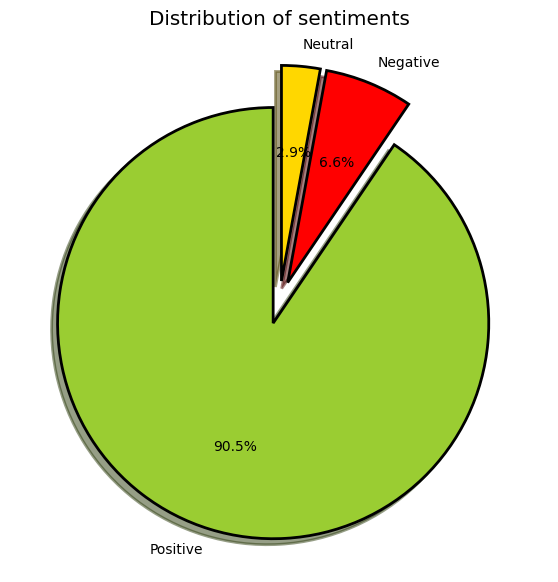

In [17]:
fig = plt.figure(figsize=(7,7))
colors = ('yellowgreen','red','gold')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['overall'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments')

In [18]:
pos_comments = df[df.overall == 'Positive']
pos_comments.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,Positive,issu,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,Positive,purchas devic work advertis never much phone m...,2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,Positive,work expect sprung higher capac think made bit...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,Positive,think work greathad diff bran 64gb card went s...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,Positive,bought retail packag arriv legit orang envelop...,2013-07-13,513,0,0,0,0,0.0,0.0


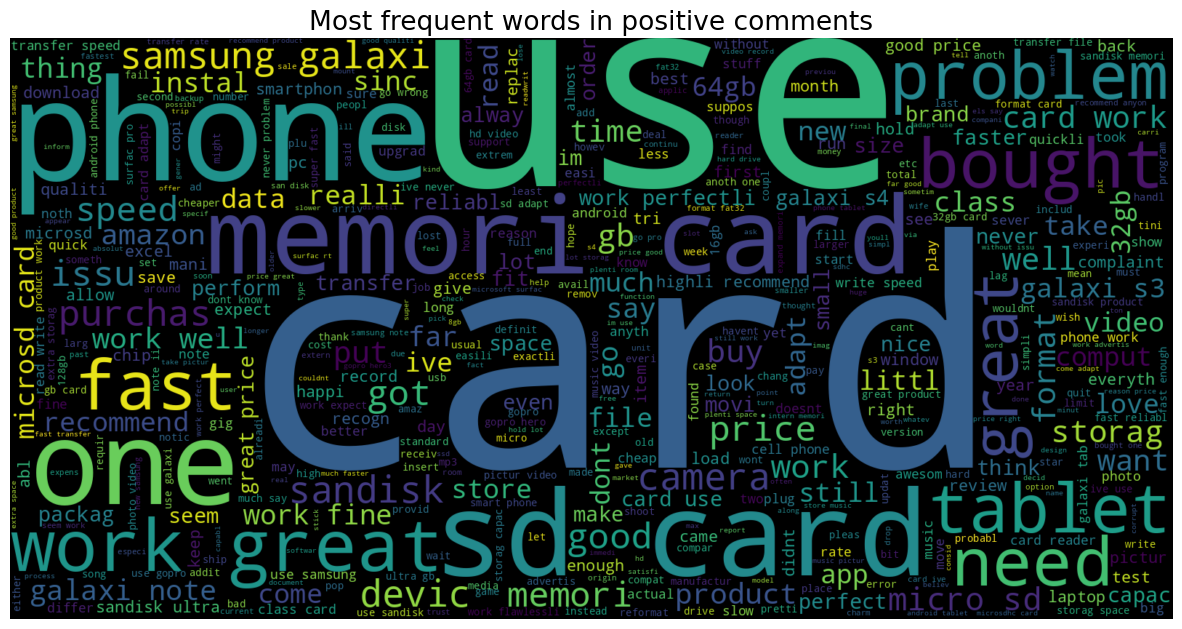

In [19]:
text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [20]:
neg_comments = df[df.overall == 'Negative']
neg_comments.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
32,32,"Abdulrahman J. Alrashed ""dr34m3r""",Negative,bought 2 sandisk 32 gb microsd use galaxi note...,2013-03-08,640,0,0,0,0,0.0,0.0
38,38,Abraham Arturo Meza Marin,Negative,bougth micro sd card trubl got kingston tell s...,2013-02-19,657,0,0,0,0,0.0,0.0
43,43,"Abused Commuter ""abused_commuter""",Negative,order galaxi s3 last month broke access sever ...,2013-07-20,506,0,1,1,-1,0.0,0.0
49,49,Ace of Sevens,Negative,use month phone decid quit mount lost pictur p...,2014-01-31,311,0,0,0,0,0.0,0.0
108,108,Alan,Negative,work actual rw speed 188 mb even class 10 mark...,2014-03-25,258,0,0,0,0,0.0,0.0


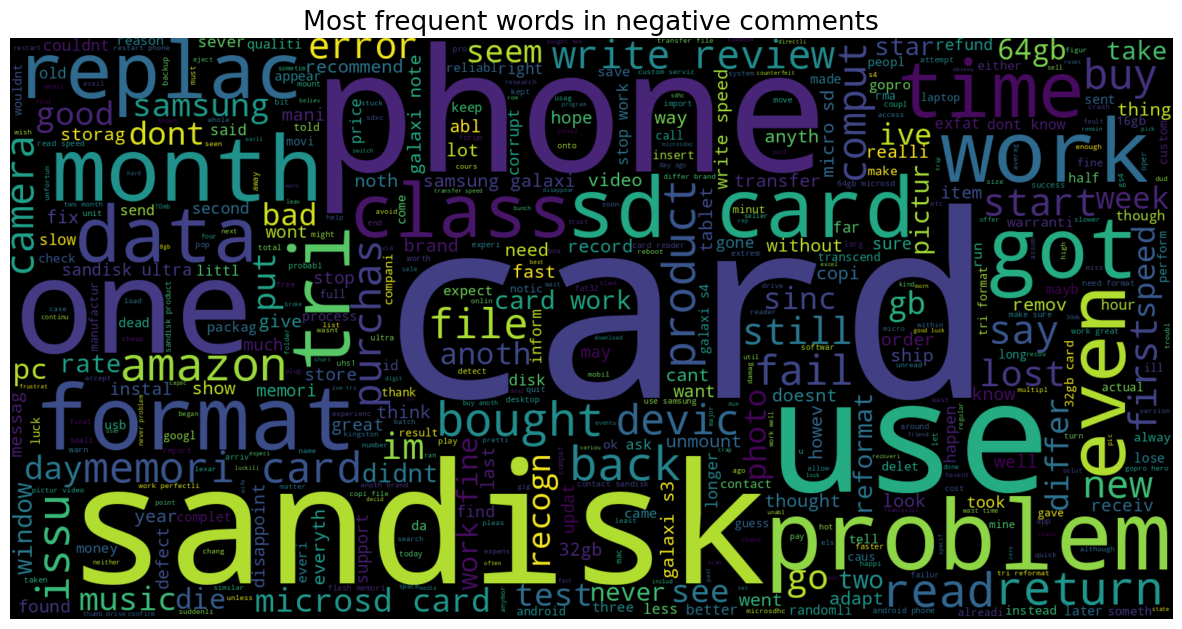

In [21]:
text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

In [22]:
neu_comments = df[df.overall == 'Neutral']
neu_comments.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
11,11,98020,Neutral,work file write bit slower expect usb3 readera...,2013-11-20,383,0,0,0,0,0.0,0.000000
64,64,"Adam Wright ""Electrical Engineer""",Neutral,card advertis uhs1 actual uhs50thi mean go sdr...,2013-09-09,455,1,0,1,1,1.0,0.206549
112,112,Albert,Neutral,job fairli cheap worth return first one exchan...,2014-04-05,247,0,0,0,0,0.0,0.000000
122,122,Alejandro Hernndez,Neutral,still dont feel fast phone guess need remov ru...,2014-03-02,281,0,0,0,0,0.0,0.000000
163,163,Alton L Spencer,Neutral,work great galaxi s4until didnt work unknown r...,2014-05-27,195,0,0,0,0,0.0,0.000000


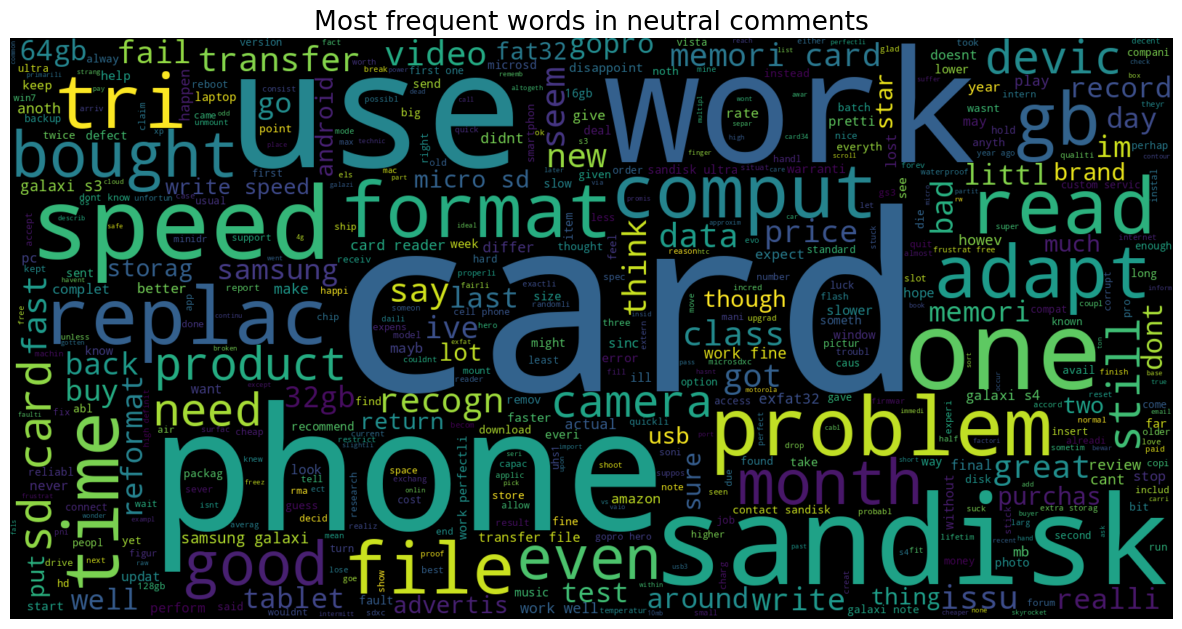

In [23]:
text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

In [24]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['reviewText'])

In [25]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features: 77546

First 20 features: 
['00' '00 001191' '00 00148' '00 00297' '001191' '001191 gb' '00148'
 '00148 gb' '0017' '0017 mb' '00297' '00297 gb' '0617' '0617 mb'
 '062413it' '062413it stop' '065' '065 vs' '0680' '0680 mbsrandom']


In [26]:
X = df['reviewText']
Y = df['overall']
X = vect.transform(X)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [28]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3928, 77546)
Size of y_train: (3928,)
Size of x_test: (983, 77546)
Size of y_test: (983,)


In [29]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

Test accuracy : 93.08%


In [30]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 31   2  31]
 [  3   0  21]
 [  7   4 884]]


              precision    recall  f1-score   support

    Negative       0.76      0.48      0.59        64
     Neutral       0.00      0.00      0.00        24
    Positive       0.94      0.99      0.97       895

    accuracy                           0.93       983
   macro avg       0.57      0.49      0.52       983
weighted avg       0.91      0.93      0.92       983



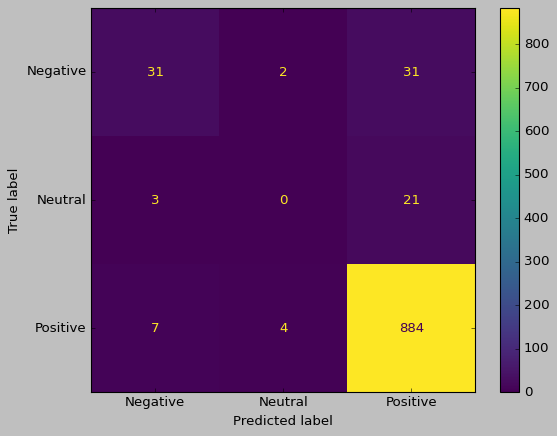

In [31]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [32]:
param_grid = {'C':[0.001,0.01,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [33]:
print("Best parameters : ", grid.best_params_)

Best parameters :  {'C': 10}


In [34]:
y_pred = grid.predict(x_test)

In [35]:
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.18%


In [36]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 32   2  30]
 [  4   0  20]
 [  6   5 884]]


              precision    recall  f1-score   support

    Negative       0.76      0.50      0.60        64
     Neutral       0.00      0.00      0.00        24
    Positive       0.95      0.99      0.97       895

    accuracy                           0.93       983
   macro avg       0.57      0.50      0.52       983
weighted avg       0.91      0.93      0.92       983



In [37]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [38]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 93.29%


In [39]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[ 37   2  25]
 [  4   0  20]
 [  8   7 880]]


              precision    recall  f1-score   support

    Negative       0.76      0.58      0.65        64
     Neutral       0.00      0.00      0.00        24
    Positive       0.95      0.98      0.97       895

    accuracy                           0.93       983
   macro avg       0.57      0.52      0.54       983
weighted avg       0.92      0.93      0.92       983



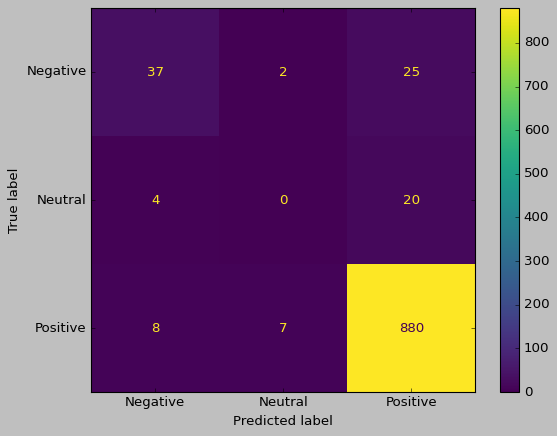

In [40]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels = SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVCmodel.classes_)
disp.plot()